In [65]:
%matplotlib inline
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import datetime
from datetime import timedelta
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (30, 15)
# mpl.rcParams['axes.grid'] = False

target="close"

In [66]:
def getDataset(full=False):
    url = "./datasets/DAT_ASCII_EURUSD_M1_2018.csv"
    df = pd.read_csv(url, names=list(["date","open", "high", "low", "close", "volume"]), header=None, sep=";")
    # df.drop(columns=['open', 'high', 'low'], inplace=True)
    pdlen=len(df)
    
    df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
    # df.set_axis(df['date'], inplace=True)
    # df.drop(columns=["volume"], inplace=True)
    df.drop(columns=["volume", "low", "open", "high"], inplace=True)
    # df["Close"]= df["close"] # compatibility
    # df["Volume"]= df["volume"] # compatibility
    # df.drop(columns=['close'], inplace=True)
    # df["ewma_close"]=df["close"].ewm(4).mean()
    if full is False:
        df=df[58::60]
        
    return df

In [67]:
# def getDataset():
#     url = "./datasets/eurusd-m15-2018/EURUSD.csv"
#     df = pd.read_csv(url)
#     # df.drop("Volume", 1, inplace=True)
#     df["Date"] = df["Date"].astype(str) + " " + df["Timestamp"]
#     df['Date'] = pd.to_datetime(df['Date'])
#     # df.set_index("Date", inplace=True)
#     # df.drop("Date", 1, inplace=True)
#     df.drop("Timestamp", 1, inplace=True)
#     df.drop("Volume", 1, inplace=True)
#     # df.drop("Open", 1, inplace=True)
#     df=df.rename(columns={"Date": "date", "Close": "close", "Open": "open", "Low": "low", "Volume": "volume", "High": "high"})
#     # df.drop("High", 1, inplace=True)
#     # df.drop("Low", 1, inplace=True)
#     df=df[0::4]
#     return df

Text(0, 0.5, 'Wartość stosunku euro do dolara')

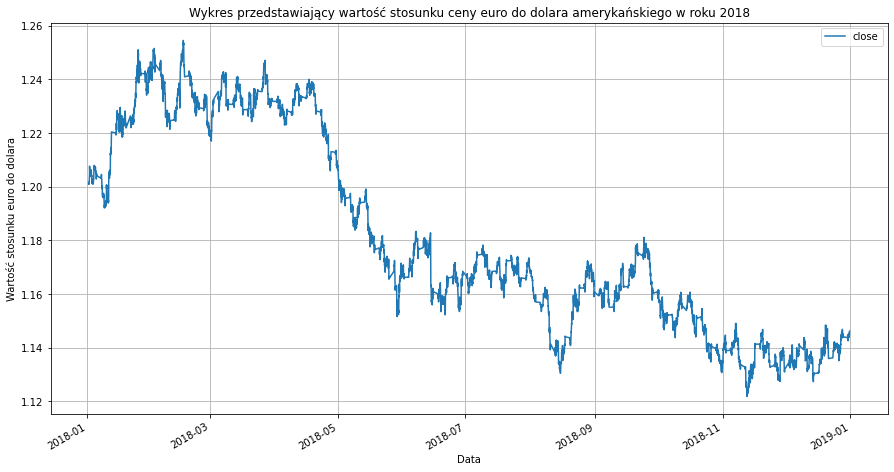

In [68]:
df = getDataset(full=False)

df.set_axis(df['date'])[target].plot(figsize=(15,8))
plt.legend(["close"])
plt.grid(True)
plt.title("Wykres przedstawiający wartość stosunku ceny euro do dolara amerykańskiego w roku 2018")
plt.xlabel("Data")
plt.ylabel("Wartość stosunku euro do dolara")

In [69]:
date_time = pd.to_datetime(df.pop('date'))
print(date_time)

58       2018-01-01 17:59:00
118      2018-01-01 18:59:00
178      2018-01-01 19:59:00
238      2018-01-01 20:59:00
298      2018-01-01 21:59:00
                 ...        
372358   2018-12-31 12:51:00
372418   2018-12-31 13:51:00
372478   2018-12-31 14:51:00
372538   2018-12-31 15:51:00
372598   2018-12-31 16:51:00
Name: date, Length: 6210, dtype: datetime64[ns]


In [70]:
df

,close
58,1.20136
118,1.20107
178,1.20161
238,1.20154
298,1.20092
...,...
372358,1.14462
372418,1.14454
372478,1.14529
372538,1.14596


In [71]:
# df[target].hist(bins=100, rwidth=0.9, figsize=(15,8))

# plt.xlabel('Stosunek euro do dolara')
# plt.ylabel('Liczba wystąpień')
# # plt.title("Histogram wystąpień ")
# plt.title("")
# plt.legend(["close"])
# plt.grid(True)

In [72]:
# def signaltonoise(a, axis=0, ddof=0):
#     a = np.asanyarray(a)
#     m = a.mean(axis)
#     sd = a.std(axis=axis, ddof=ddof)
#     return np.where(sd == 0, 0, m/sd)

# print(signaltonoise(df["close"]))    

In [73]:
# adjusted_date_time = []
# print([date_time.values[0]+timedelta(minutes=(i-1)*1) for i in range(len(date_time.values))])


date_time_clone = date_time.copy()
new_values=pd.date_range(date_time.values[0], periods=len(date_time), freq='1h')

i=0
for key in date_time_clone.copy().keys():
    date_time_clone[key]=new_values[i]
    i=i+1

date_time=date_time_clone
print(date_time)

58       2018-01-01 17:59:00
118      2018-01-01 18:59:00
178      2018-01-01 19:59:00
238      2018-01-01 20:59:00
298      2018-01-01 21:59:00
                 ...        
372358   2018-09-17 06:59:00
372418   2018-09-17 07:59:00
372478   2018-09-17 08:59:00
372538   2018-09-17 09:59:00
372598   2018-09-17 10:59:00
Name: date, Length: 6210, dtype: datetime64[ns]


In [74]:
# df.head()

In [75]:
# df.describe()

In [76]:
# print(df.corr().transpose())

In [77]:
# print(df.corr().to_latex())

In [78]:
# pd.plotting.scatter_matrix(df[["close", "high", "low", "open"]], figsize=(12,10))

In [79]:
# plot_features = df[:480]
# plot_features.index = date_time[:480]
# _ = plot_features.plot(subplots=True)

In [80]:
timestamp_s = date_time.map(datetime.datetime.timestamp)
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

timestamp_s[:5]

58     1.514826e+09
118    1.514830e+09
178    1.514833e+09
238    1.514837e+09
298    1.514840e+09
Name: date, dtype: float64

In [81]:
# df.head()

In [82]:
# df[target].plot()

In [83]:
mpl.rcParams['figure.figsize'] = (20, 10)
# plt.plot(np.array(df['Day sin'])[:25], linewidth=2.5)
# plt.plot(np.array(df['Day cos'])[:25], linewidth=2.5)
# plt.xlabel('Czas [h]')
# plt.xlim([0, 24])
# plt.xticks([i for i in range(25)])
# plt.legend(["Sygnał o charakterze sinusoidalnym","Sygnał o charakterze cosinusoidalnym"])
# plt.title('Sygnał czasu dnia')

In [84]:
mpl.rcParams['figure.figsize'] = (20, 12)

In [85]:
# signal=target
# fft = tf.signal.rfft(df[signal])
# # fft = tf.signal.rfft(df["Day sin"])
# f_per_dataset = np.arange(0, len(fft))

# n_samples_h = len(df[signal])
# hours_per_year = 24*365.2524
# years_per_dataset = n_samples_h/(hours_per_year)

# f_per_year = f_per_dataset/years_per_dataset
# plt.step(f_per_year, np.abs(fft))
# plt.xscale('log')
# plt.ylabel("Amplituda")
# plt.title("Transformata Fouriera wartości zamknięcia")
# plt.ylim(0, 150)
# plt.xlim([0.1, max(plt.xlim())])
# # plt.xticks([60,1, 365.2524], labels=['1/Rok', '1/Dzień',"godzina" ])
# _ = plt.xlabel('Częstotliwość (skala logarytmiczna)')

In [86]:
# signal=target
# fft = tf.signal.rfft(df[signal])
# # fft = tf.signal.rfft(df["Day sin"])
# f_per_dataset = np.arange(0, len(fft))

# n_samples_h = len(df[signal])
# hours_per_year = 24*365.2524
# years_per_dataset = n_samples_h/(hours_per_year)

# f_per_year = f_per_dataset/years_per_dataset
# plt.step(f_per_year, np.abs(fft))
# plt.xscale('log')
# plt.ylabel("Amplituda")
# plt.title("Transformata Fouriera wartości zamknięcia")
# plt.ylim(0, 150)
# plt.xlim([0.1, max(plt.xlim())])
# # plt.xticks([1, 365.2524], labels=['1/Rok', '1/Dzień'])
# _ = plt.xlabel('Częstotliwość (skala logarytmiczna)')

In [87]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [88]:
# train_df

In [89]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [90]:
# df_std = train_df.melt(var_name='Kolumna ze zbioru danych', value_name='Wartość znormalizowanej zmienna')
# plt.figure(figsize=(12, 6))
# ax = sns.violinplot(x='Kolumna ze zbioru danych', y='Wartość znormalizowanej zmienna', data=df_std)
# _ = ax.set_xticklabels(df.keys(), rotation=90)

In [91]:
# train_df[["Year sin", "Year cos"]].plot()

In [92]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [93]:
# w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
#                      label_columns=[target])
# w2

In [94]:
def plotLossHistory(history, figsize=(30,15)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(history.history['loss'], label='Wartość funkcji kosztu dla zbioru treningowego')
    ax.plot(history.history['val_loss'], label='Wartość funkcji kosztu dla zbioru walidacyjnego')
    plt.ylabel('Wartość funkcji kosztu')
    plt.xlabel('Numer epoki')
    ax.legend(loc="upper left")
    plt.title("Wartość funkcji kosztu na przestrzeni epok")
    plt.show()

In [95]:
def plotMAEHistory(history):
    fig, ax = plt.subplots(figsize=(30,15))
    ax.plot(history.history['mean_absolute_error'], label='MAE podczas treningu')
    ax.plot(history.history['val_mean_absolute_error'], label='MAE na zbiorze walidacyjnym')
    plt.ylabel('MAE value')
    plt.xlabel('Numer epoki')
    ax.legend(loc="upper left")
    plt.show()

In [96]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [97]:
# # Stack three slices, the length of the total window:
# example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
#                            np.array(train_df[100:100+w2.total_window_size]),
#                            np.array(train_df[200:200+w2.total_window_size]),
#                            ])


# example_inputs, example_labels = w2.split_window(example_window)

# print('All shapes are: (batch, time, features)')
# print(f'Window shape: {example_window.shape}')
# print(f'Inputs shape: {example_inputs.shape}')
# print(f'labels shape: {example_labels.shape}')

In [98]:
# w2.example = example_inputs, example_labels

In [99]:
def plot(self, model=None, plot_col=target, max_subplots=3, title=None):
  inputs, labels = self.example
  # plt.figure(figsize=(15, 15))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)

    if title is not None and n==0:
      plt.title(title)

    plt.xticks(np.arange(0, len(self.input_indices)+1, step=1))
    
    plt.ylabel(f'{plot_col} [znormalizowana wartość]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Wejście', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Prawdziwe wartości', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
  
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predykcje',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Czas od pierwszej próbki [h]')

WindowGenerator.plot = plot

In [100]:
# w2.plot()

In [101]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [102]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [103]:
# for example_inputs, example_labels in w2.train.take(1):
#   print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
#   print(f'Labels shape (batch, time, features): {example_labels.shape}')

In [104]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=[target])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['close']

In [105]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each timestep is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [106]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [107]:
baseline = Baseline(label_index=column_indices[target])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance_single = {}
performance_single = {}
val_performance_single['Baseline'] = baseline.evaluate(single_step_window.val)
performance_single['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)
print(val_performance_single['Baseline'])
print(baseline.metrics_names)
print(performance_single['Baseline'])

39/39 [==============================] - 0s 1ms/step - loss: 9.1805e-04 - mean_absolute_error: 0.0214
[0.0009180533816106617, 0.021356964483857155]
['loss', 'mean_absolute_error']
[0.0009144435171037912, 0.020845530554652214]


In [108]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=[target])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['close']

In [109]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', baseline(single_step_window.example[0]).shape)

Input shape: (32, 1, 5)
Output shape: (32, 1, 1)


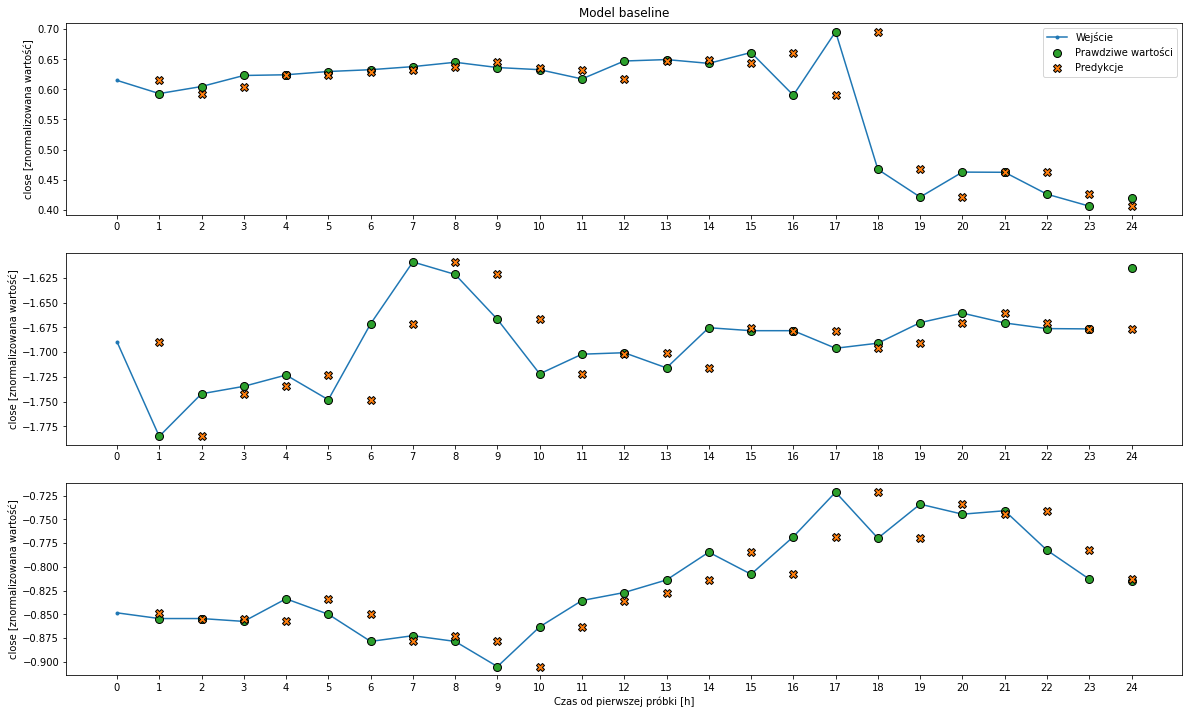

In [110]:
wide_window.plot(baseline, title="Model baseline")

In [111]:
val_performance_single['BaselineWide'] = baseline.evaluate(wide_window.val)
performance_single['BaselineWide'] = baseline.evaluate(wide_window.test, verbose=0)
print(baseline.metrics_names)
print(val_performance_single['BaselineWide'])
print(performance_single['BaselineWide'])

39/39 [==============================] - 0s 1ms/step - loss: 9.2138e-04 - mean_absolute_error: 0.0215
['loss', 'mean_absolute_error']
[0.0009213750599883497, 0.021463902667164803]
[0.0009330697939731181, 0.020980104804039]


In [112]:
# print('Input shape:', single_step_window.example[0].shape)
# print('Output shape:', linear(single_step_window.example[0]).shape)

In [113]:
MAX_EPOCHS = 30

def compile_and_fit(model, window, patience=5, max_epochs=MAX_EPOCHS):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=max_epochs,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [114]:
# history = compile_and_fit(linear, single_step_window)

# val_performance['Linear'] = linear.evaluate(single_step_window.val)
# performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

In [115]:
# print('Input shape:', wide_window.example[0].shape)
# print('Output shape:', baseline(wide_window.example[0]).shape)

In [116]:
# wide_window.plot(linear)

In [117]:
# plt.bar(x = range(len(train_df.columns)),
#         height=linear.layers[0].kernel[:,0].numpy())
# axis = plt.gca()
# axis.set_xticks(range(len(train_df.columns)))
# _ = axis.set_xticklabels(train_df.columns, rotation=90)

In [118]:
# lstm_model = tf.keras.models.Sequential([
#     # Shape [batch, time, features] => [batch, time, lstm_units]
#     tf.keras.layers.LSTM(30, return_sequences=True),
#     # tf.keras.layers.LSTM(30, return_sequences=True),
#     # Shape => [batch, time, features]
#     tf.keras.layers.Dense(units=1)
# ])

In [119]:
# print('Input shape:', wide_window.example[0].shape)
# print('Output shape:', lstm_model(wide_window.example[0]).shape)

In [120]:
# %%time
# history = compile_and_fit(lstm_model, wide_window)


In [121]:
# val_performance_single['LSTM'] = lstm_model.evaluate(wide_window.val)
# performance_single['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

In [122]:
# plotMAEHistory(history)

In [123]:
# plotLossHistory(history)

In [124]:
# wide_window.plot(lstm_model)

In [125]:
mpl.rcParams['figure.figsize'] = (20, 10)

In [128]:
import time

def exper(n=10):
    start = time.time()

    print(f"n={n}")

    rnn_model = tf.keras.Sequential([
        tf.keras.layers.LSTM(n, return_sequences=True),
        tf.keras.layers.LSTM(n, return_sequences=True),
        tf.keras.layers.LSTM(n, return_sequences=True),
        tf.keras.layers.LSTM(n, return_sequences=True),
        tf.keras.layers.Dense(1)
    ])

    history = compile_and_fit(rnn_model, wide_window, max_epochs=50, patience=50)

    IPython.display.clear_output()

    end = time.time()
    print("validation")
    val_performance_single['RNN'] = rnn_model.evaluate(wide_window.val, verbose=1)
    vali=val_performance_single['RNN']
    print("test")
    performance_single['RNN'] = rnn_model.evaluate(wide_window.test, verbose=1)
    testi=performance_single['RNN']

    ret = f"{n} & {end-start:0.3f} & {vali[0]:0.4f} & {vali[1]:0.4f} & {testi[0]:0.4f} & {testi[1]:0.4f} \\\\"

    return ret, rnn_model, history

# ret, model, history = exper(n=240)
# ret, model40, history = exper(n=40)

# print(ret)
# 20,30,40,50,60,80,120,240
#5,10,20,30,40,50,60,80,120 
xd = [exper(i)[0] for i in np.array([5,10,20,30,40,50,60,80,120,240])]
print(xd)


# wide_window.plot(model)

validation
39/39 [==============================] - 2s 52ms/step - loss: 0.0049 - mean_absolute_error: 0.0603
test
19/19 [==============================] - 1s 52ms/step - loss: 0.0066 - mean_absolute_error: 0.0749
['5 & 173.420 & 0.0108 & 0.0792 & 0.1362 & 0.3487 \\\\', '10 & 200.976 & 0.0070 & 0.0688 & 0.0200 & 0.1365 \\\\', '20 & 225.533 & 0.0031 & 0.0435 & 0.0094 & 0.0875 \\\\', '30 & 218.787 & 0.0083 & 0.0715 & 0.0313 & 0.1707 \\\\', '40 & 237.373 & 0.0036 & 0.0472 & 0.0075 & 0.0700 \\\\', '50 & 247.152 & 0.0079 & 0.0691 & 0.0246 & 0.1506 \\\\', '60 & 263.715 & 0.0075 & 0.0686 & 0.0224 & 0.1441 \\\\', '80 & 258.259 & 0.0080 & 0.0728 & 0.0225 & 0.1445 \\\\', '120 & 348.038 & 0.0023 & 0.0379 & 0.0052 & 0.0641 \\\\', '240 & 913.971 & 0.0049 & 0.0603 & 0.0066 & 0.0749 \\\\']


In [ ]:
def plotMany(self, model=None, plot_col=target, max_subplots=3, title=None, additionalModels=None):
  inputs, labels = self.example
  # plt.figure(figsize=(15, 15))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)

    if title is not None and n==0:
      plt.title(title)

    plt.xticks(np.arange(0, len(self.input_indices)+1, step=1))
    
    plt.ylabel(f'{plot_col} [znormalizowana wartość]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Wejście', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index
 
    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Prawdziwe wartości', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
  
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predykcje',
                  c='#ff7f0e', s=64)
    if additionalModels is not None:
        for aModel in additionalModels:
            predictions = aModel(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index], label='Predykcjee', s=64)       
    if n == 0:
      plt.legend()

  plt.xlabel('Czas od pierwszej próbki [h]')

WindowGenerator.plotMany = plotMany

In [ ]:
wide_window.plotMany(model20, additionalModels=np.array([model40]))

In [ ]:
plotLossHistory(history, figsize=(20,8))

In [ ]:
plotMAEHistory(history)

In [ ]:
gru_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.GRU(48, return_sequences=True),
    tf.keras.layers.GRU(48, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [ ]:
history = compile_and_fit(gru_model, wide_window)

IPython.display.clear_output()
val_performance_single['GRU'] = gru_model.evaluate(wide_window.val)
performance_single['GRU'] = gru_model.evaluate(wide_window.test, verbose=0)

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance_single.values()]
test_mae = [v[metric_index] for v in performance_single.values()]

plt.ylabel('średni bląd bezwzględny [wartość close, znormalizowany]')
plt.bar(x - 0.17, val_mae, width, label='Walidacja')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
performance

In [ ]:
for name, value in performance_single.items():
  print(f'{name:12s}: {value[1]:0.4f}')

In [ ]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1, label_columns=[target])

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

In [ ]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [ ]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [ ]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

In [ ]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

In [ ]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each timestep is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [ ]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small
        # So initialize the output layer with zeros
        kernel_initializer=tf.initializers.zeros)
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

In [ ]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [ ]:
wide_window.plot(residual_lstm)

In [ ]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

In [ ]:
OUT_STEPS = 12
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

In [ ]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.val, verbose=0)
multi_window.plot(last_baseline)

In [ ]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(24, return_sequences=True),
    tf.keras.layers.LSTM(24, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.train, verbose=0)
multi_window.plot(multi_lstm_model)

In [ ]:
multi_gru_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.GRU(24, return_sequences=True),
    tf.keras.layers.GRU(24, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_gru_model, multi_window)

IPython.display.clear_output()

multi_val_performance['GRU'] = multi_gru_model.evaluate(multi_window.val)
multi_performance['GRU'] = multi_gru_model.evaluate(multi_window.train, verbose=0)
multi_window.plot(multi_gru_model)

In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [ ]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [ ]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [ ]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

In [ ]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [ ]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

In [ ]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

In [ ]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [ ]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')